In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
df = pd.read_csv('../data/df_model_full_merge.csv')  # read data with all predictions
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17796 entries, 0 to 17795
Data columns (total 64 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              17796 non-null  int64  
 1   LeagueCountry                           17796 non-null  object 
 2   League                                  17796 non-null  object 
 3   NationalLeagueLevel                     17796 non-null  object 
 4   Club                                    17796 non-null  object 
 5   No                                      17511 non-null  float64
 6   Name                                    17796 non-null  object 
 7   Value                                   17796 non-null  float64
 8   HighestValue                            17796 non-null  float64
 9   Age                                     17794 non-null  float64
 10  Height                                  16717 non-null  fl

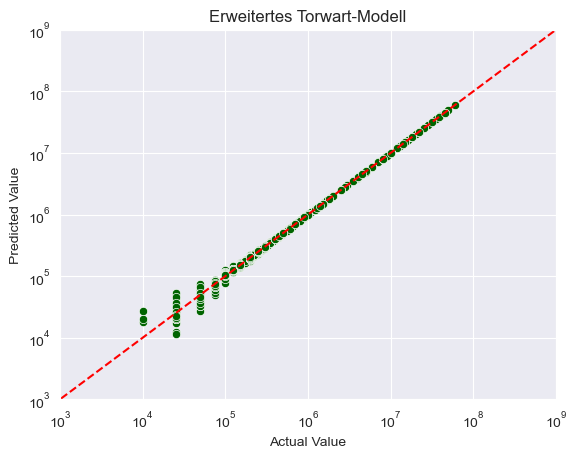

In [24]:
# fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,ncols=2, figsize=(20, 20), sharex=True, sharey=True)  # create subplots
sns.set_style("darkgrid")

def plot_model(df, column, model_name):
    chart_data = df[df[column].notna()]  # filter data for the selected model
    n, r2, rmse = calculate_measures(chart_data, column)  # calculate the measures
    chart_data = chart_data[['Value', column]]
    chart_data.columns = ['Actual Value', 'Predicted Value']
    sns.scatterplot(chart_data, x='Actual Value', y='Predicted Value', color='darkgreen').set(xlim=(10**3, 10**9), ylim=(10**3, 10**9), title=model_name)  # plot the scatterplot
    plt.xscale('log')  # scale the x axis
    plt.yscale('log')  # scale the y axis
    text = rf"$n={n}$" + '\n' + rf"$R^2={r2}$" + '\n' + rf"$RMSE={rmse}$" # format the text with the measures to display
    # plt.text(10**3.5, 10**8, text, fontsize=12)  # place the text on the plot
    plt.plot(np.arange(0, 10**9, 1000000), np.arange(0, 10**9, 1000000), '--r')  # display the 45 degrees line as a benchmark for perfect predictions

# calcualte the measures in the following function
def calculate_measures(df, column):
    n = len(df.index)
    r2 = round(r2_score(df['Value'], df[column]), 2)
    rmse = int(round(mean_squared_error(df['Value'], df[column], squared=False), 0))
    return n, r2, rmse


# plot_model(df, column='PredictedValueSimpleModelFs', model_name='Einfaches Feldspieler-Modell') # plot the simple model fs in the first axes
# plot_model(df, column='PredictedValueSimpleModelTw', model_name='Einfaches Torwart-Modell')  # plot the simple model tw in the second axes
# plot_model(df, column='PredictedValueExtensiveModelFs', model_name='Erweitertes Feldspieler-Modell') # plot the extensive model fs in the third axes
plot_model(df, column='PredictedValueExtensiveModelTw', model_name='Erweitertes Torwart-Modell')  # plot the extensive model tw in the fourth axes

plt.show()

TypeError: plot_model() got an unexpected keyword argument 'axes'

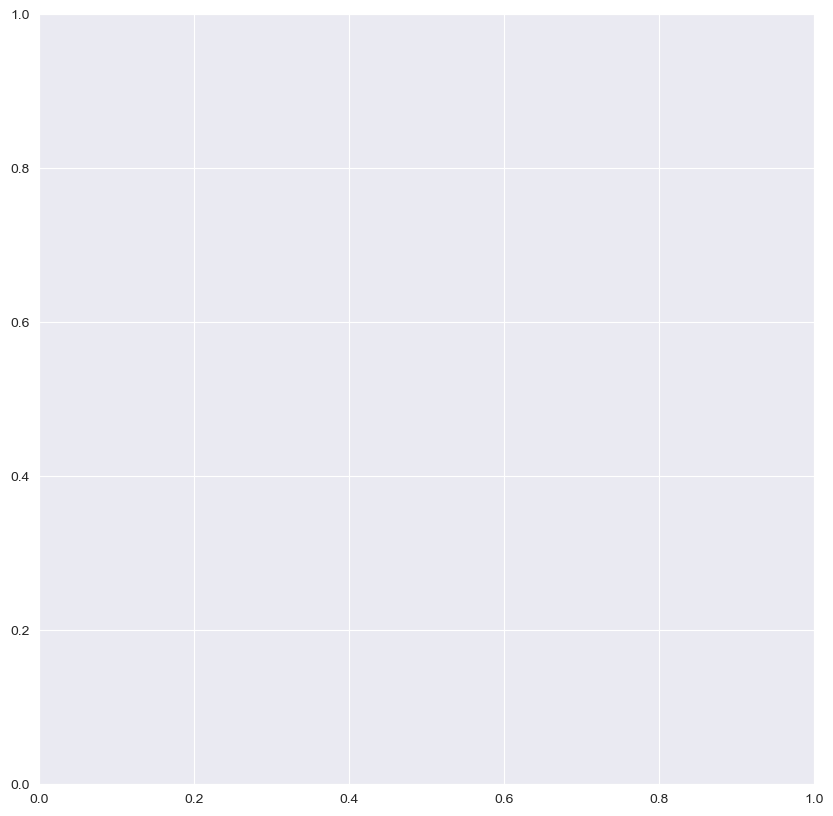

In [22]:
fig, axes = plt.subplots(figsize=(10, 10))

plot_model(df, column='PredictedValue', model_name='Kombinierte Modelle', axes=axes)  # compare the consistent and combined prediction score with the actual values

plt.show()